<h1> Desafio 1 - Grupo 2</h1>

<a id="section_integrantes"></a> 
## Integrantes

*  Márquez, Lucas Andrés
*  Mazzi, Agustin Estanislao
*  Murat, Natalia
*  Morinigo, Pablo Daniel
*  Quintana, Maria Dolores

---


<a id="section_toc"></a>
## <u>Tabla de Contenidos</u>

[1. Introduccion](#section_intro)

<!-- [Dataset](#section_dataset)

[Imports](#section_imports)   -->

[2. Valores Faltantes](#section_limpieza_datos) 

[3. Limpieza de Outliers](#section_limpieza_de_outliers)

[4. Eliminacion de Duplicados](#section_elim_dup)

[5. Nuevos Campos](#section_varnuevas)

[6. Dataset Final](#section_dbfinal)

---


## 1. Introduccion

[volver a TOC](#section_toc)

El objetivo de este desafio consiste en efectuar una limpieza del dataset provisto diseñando estrategias
para lidiar con los datos perdidos en ciertas variables, realizar un análisis descriptivo de las principales variables y si en necesario crear nuevas columnas a partir de las características dadas que puedan tener valor
predictivo.

---


**1.1. Dataset**:

Usaremos un dataset que publica periódicamente la inmobiliaria Properati y que contiene información sobre ofertas de propiedades para la venta:

https://drive.google.com/drive/folders/1qEIWk8Wyp7w_ic5XwACuSiD9K4aiYlOW?usp=sharing 

El dataset contiene información sobre todas las propiedades georeferenciadas de la base de
datos de la empresa. La información que incluye de cada propiedad es la siguiente:
* ID de registro
* Tipo de la propiedad (house, apartment, ph)
* Operación del aviso (sell, rent)
* Nombre del lugar
* Nombre del lugar + nombre de sus ‘padres’
* ID de geonames del lugar (si está disponible)
* Latitud, longitud
* Precio original del aviso
* Moneda original del aviso (ARS, USD)
* Precio del aviso en moneda local (ARS)
* Precio aproximado en USD
* Superficie en m2
* Superficie cubierta en m2
* Precio en USD/m2
* Precio por m2
* N° de piso, si corresponde
* Ambientes
* URL en Properati
* Descripción
* Título
* URL de un thumbnail de la primera foto

---
---

<a id="section_imports"></a> 
**1.2. Imports**:

[volver a TOC](#section_toc)

In [1]:
import pandas as pd
import numpy as np
from numpy import mean
from numpy import median
import matplotlib.pyplot as plt
import re
import seaborn as sns
%matplotlib inline
import plotly.express as px
import chart_studio
import chart_studio.plotly as py

In [2]:
data = pd.read_csv("Data/properatti.csv")
data.dtypes

Unnamed: 0                      int64
operation                      object
property_type                  object
place_name                     object
place_with_parent_names        object
country_name                   object
state_name                     object
geonames_id                   float64
lat-lon                        object
lat                           float64
lon                           float64
price                         float64
currency                       object
price_aprox_local_currency    float64
price_aprox_usd               float64
surface_total_in_m2           float64
surface_covered_in_m2         float64
price_usd_per_m2              float64
price_per_m2                  float64
floor                         float64
rooms                         float64
expenses                      float64
properati_url                  object
description                    object
title                          object
image_thumbnail                object
dtype: objec

In [3]:
pd.set_option('display.max_columns', None)
data.head(2)

,Unnamed: 0,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
0,0,sell,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6618237,-58.5088387",-34.661824,-58.508839,62000.0,USD,1093959.0,62000.0,55.0,40.0,1127.272727,1550.0,NaN,NaN,NaN,http://www.properati.com.ar/15bo8_venta_ph_mat...,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",2 AMB TIPO CASA SIN EXPENSAS EN PB,https://thumbs4.properati.com/8/BluUYiHJLhgIIK...
1,1,sell,apartment,La Plata,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|,Argentina,Bs.As. G.B.A. Zona Sur,3432039.0,"-34.9038831,-57.9643295",-34.903883,-57.964330,150000.0,USD,2646675.0,150000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15bob_venta_depart...,Venta de departamento en décimo piso al frente...,VENTA Depto 2 dorm. a estrenar 7 e/ 36 y 37 ...,https://thumbs4.properati.com/7/ikpVBu2ztHA7jv...


**1.2. Elimino columnas:** eliminamos las columnas que no vamos a utilizar

[volver a TOC](#section_toc)

In [4]:
data.drop(['Unnamed: 0','image_thumbnail','properati_url',], axis=1,inplace=True)

<a id="section_limpieza_datos"></a> 
## 2. Limpieza de Datos

[2.1. Columnas relacionadas con el precio: 'price', 'currency', 'price_aprox_local_currency' y 'price_aprox_usd'](#section_price)

[2.2. Columnas relacionadas con la superficie: 'surface_total_in_m2' y 'surface_covered_in_m2'](#section_metros)

[2.3. Columnas Rooms](#section_rooms)

[2.4. Columnas Floor](#section_floor)

[2.5. Columnas de precio por metro cuadrado](#section_price_per_m2)


[volver a TOC](#section_toc)

In [5]:
data.isnull().mean()

operation                     0.000000
property_type                 0.000000
place_name                    0.000190
place_with_parent_names       0.000000
country_name                  0.000000
state_name                    0.000000
geonames_id                   0.154405
lat-lon                       0.425260
lat                           0.425260
lon                           0.425260
price                         0.168372
currency                      0.168380
price_aprox_local_currency    0.168372
price_aprox_usd               0.168372
surface_total_in_m2           0.324435
surface_covered_in_m2         0.164222
price_usd_per_m2              0.433947
price_per_m2                  0.276869
floor                         0.934837
rooms                         0.609058
expenses                      0.882346
description                   0.000016
title                         0.000000
dtype: float64

  <a id="section_price"></a> 
  
**2.1. Precio y moneda**:

[volver a TOC](#section_toc)

Tiene aproximadamente un 17% de nulos. Intentaremos completar estos valores faltantes aplicando regexs a las columnas titulo y descripcion.
En caso de encontrarlo, tambien actualizaremos los valores correspondientes a las columnas relacionadas (price_aprox_usd, price_aprox_local_currency y currency)

In [6]:
print(data['price'].shape[0])
print(data['price'].isnull().sum())
print(data['price'].isnull().mean())

121220
20410
0.1683715558488698


In [7]:
pattern_precio = "(?P<moneda>U\$S|USD|U\$D)\s?(?P<precio>\d+(([.]|,)\d+)?)"

pattern_precio_regex = re.compile(pattern_precio,flags = re.IGNORECASE) #Perform case-insensitive matching

desc_series = data['description']
title_series = data['title']

# Busco en description:
rdo_precio_d = desc_series.apply(lambda x: x if x is np.NaN else pattern_precio_regex.search(x))
precio_match_d=rdo_precio_d[rdo_precio_d.notnull()].apply(lambda x: x.group('precio') if x.group(4) is None else x.group('precio').replace(x.group(4) ,'')).astype(float)

#le doy un min al valor obtenido porque muchos avisos solo incluian el precio de la cochera
data.loc[precio_match_d[precio_match_d>30000].index,'price_usd_clean'] = precio_match_d[precio_match_d>30000]
data.loc[precio_match_d[precio_match_d>30000].index,'price_clean'] = precio_match_d[precio_match_d>30000]

# Busco en title:
rdo_precio_t = title_series.apply(lambda x: x if x is np.NaN else pattern_precio_regex.search(x))
precio_match_t=rdo_precio_t[rdo_precio_t.notnull()].apply(lambda x: x.group('precio') if x.group(4) is None else x.group('precio').replace(x.group(4) ,'')).astype(float)

# le doy un min al valor obtenido porque muchos avisos solo incluian el precio de la cochera
data.loc[precio_match_t[precio_match_t>30000].index,'price_usd_clean'] = precio_match_t[precio_match_t>30000]
data.loc[precio_match_t[precio_match_t>30000].index,'price_clean'] = precio_match_t[precio_match_t>30000]

# Completo la moneda para estos registros:
data.loc[data['price_usd_clean'].notnull(),'currency_clean'] = 'USD'

# Remplazo con la info de price y precio_usd:
data.loc[(data['price_aprox_usd'].notnull()) & (data['price_aprox_usd'] != 0) ,'price_usd_clean'] = data.loc[(data['price_aprox_usd'].notnull()) & (data['price_aprox_usd'] != 0),'price_aprox_usd']
data.loc[(data['price'].notnull()) & (data['price'] != 0) ,'price_clean'] = data.loc[(data['price'].notnull()) & (data['price'] != 0),'price']

# Creo price_local_currency_clean:
data['price_local_currency_clean'] = data['price_aprox_local_currency']

data.loc[(data['price_aprox_local_currency'].isnull()) & (data['currency_clean'] == 'USD'),'price_local_currency_clean'] = data.loc[(data['price_aprox_local_currency'].isnull()) & (data['currency_clean'] == 'USD'),'price_usd_clean']*17.6445

data.loc[data['currency'].notnull(),'currency_clean'] = data.loc[data['currency'].notnull(),'currency']
# data.loc[data['price_usd_clean'].notnull(),['price','price_usd_clean']]
# data[['precio','precio_usd_regex']].value_counts()
print(data['price_clean'].isnull().mean())

0.1472034317769345


Depues de aplicar regexs aun tenemos un 15% aprox. de nulos. Como la variable a estimar por el modelo es 'price_usd_per_m2' eliminaremos todos los nulls que no pudimos imputar

In [8]:
data.dropna(subset=['price_clean'],inplace=True) #estoy sacando tmb los 0 de price que eran nulos en price_clean
desc_series = data['description']
title_series = data['title']

Visualización final:

In [9]:
# plt.figure(figsize =(12, 8))
# sns.barplot(x = 'currency_clean', y = 'price_clean', hue = 'property_type', data = data, estimator=median, ci=None)
# plt.ylim(0,3000000)

  <a id="section_metros"></a> 

**2.2. Metros totales y cubiertos**:

[volver a TOC](#section_toc)

Ahora trabajaremos con las metricas relacionadas con la superficie. La columna surface_total_in_m2 tiene aproximadamente un 31% de nulls y surface_covered_in_m2 13%
        


In [10]:
print(data['price'].shape[0])
print(data['surface_total_in_m2'].isnull().sum())
print(data['surface_total_in_m2'].isnull().mean())
print(data['surface_covered_in_m2'].isnull().sum())
print(data['surface_covered_in_m2'].isnull().mean())
#casos sin informacion en alguna de las dos variables:
print(data.loc[np.logical_xor(data['surface_total_in_m2'].notnull(),data['surface_covered_in_m2'].notnull())].shape[0])
#casos sin informacion tanto en surface_total_in_m2 como en surface_covered_in_m2:
print(data.loc[(data['surface_total_in_m2'].isnull()) & (data['surface_covered_in_m2'].isnull())].shape[0])

103376
32301
0.3124613062993345
13254
0.12821157715523912
30149
7703


Para los casos en los que alguno de los dos campos no es null, imputaremos el valor faltante en funcion del otro. Para eso calcularemos la proporcion media entre surface_total_in_m2 y surface_covered_in_m2 por tipo de propiedad: 

In [11]:
#primero corrijo los casos para los que la superficie total es menor que la cubierta suponiendo por los casos revisados que estan invertidos
data_filled=data.loc[(data['surface_total_in_m2'].notnull()) & (data['surface_covered_in_m2'].notnull())].copy()
data_filled['surface_total_in_m2_clean'] = data_filled.apply(lambda x: x['surface_covered_in_m2'] if x['surface_total_in_m2']<x['surface_covered_in_m2'] else x['surface_total_in_m2'],axis=1) 
data_filled['surface_covered_in_m2_clean'] = data_filled.apply(lambda x: x['surface_total_in_m2'] if x['surface_total_in_m2']<x['surface_covered_in_m2'] else x['surface_covered_in_m2'],axis=1)
data_filled['proporcion']=data_filled['surface_covered_in_m2_clean']/ data_filled['surface_total_in_m2_clean']
relacion_mts=data_filled.groupby('property_type').agg({'proporcion':'mean'})
relacion_mts

,proporcion
property_type,
PH,0.805497
apartment,0.885888
house,0.683985
store,0.929577


In [12]:
data_null_mts= data.loc[np.logical_xor(data['surface_total_in_m2'].notnull(),data['surface_covered_in_m2'].notnull())]
data_null_mts2=data_null_mts.merge(right= relacion_mts, how='left',on='property_type').set_axis(data_null_mts.index)
data_null_mts_tot=data_null_mts2.loc[data_null_mts2['surface_total_in_m2'].isnull(),['surface_covered_in_m2','proporcion']]
data_null_mts_cub=data_null_mts2.loc[data_null_mts2['surface_covered_in_m2'].isnull(),['surface_total_in_m2','proporcion']]
# Completo 'surface_total_in_m2_clean'
data['surface_total_in_m2_clean']=data.apply(lambda x: x['surface_covered_in_m2'] if x['surface_total_in_m2']<x['surface_covered_in_m2'] else x['surface_total_in_m2'],axis=1)
data.loc[data_null_mts_tot.index,'surface_total_in_m2_clean'] = data_null_mts_tot['surface_covered_in_m2']/data_null_mts_tot['proporcion']
# Completo 'surface_covered_in_m2_clean'
#data['surface_covered_in_m2_clean']=data['surface_covered_in_m2'] lo cambie!:
data['surface_covered_in_m2_clean']=data.apply(lambda x: x['surface_total_in_m2'] if x['surface_total_in_m2']<x['surface_covered_in_m2'] else x['surface_covered_in_m2'],axis=1)
data.loc[data_null_mts_cub.index,'surface_covered_in_m2_clean'] = data_null_mts_cub['surface_total_in_m2']*data_null_mts_cub['proporcion']

  **2.2.2.** Para los casos en los que ambos valores son nulos utilizaremos regexs para extraer el dato de las columnas titulo y descripcion

In [13]:
null_mts_cubytot=data.loc[(data['surface_total_in_m2'].isnull()) & (data['surface_covered_in_m2'].isnull())]
data.loc[(data['surface_total_in_m2'].isnull()) & (data['surface_covered_in_m2'].isnull())].shape[0]

7703

In [14]:
# comienzo con la regex mas general y depues voy reemplazando los casos en los que puedo identificar si es total o cubierta
pattern_mts ='(?P<metros>\d\d+(([.]|,)\d+)?)(\s)?(m2|metros|metros2|mts2|mt2|m²|mts²|mts|superficie)'
pattern_mts_regex = re.compile(pattern_mts,flags = re.IGNORECASE) #Perform case-insensitive matching

# Busco en description:
rdo_mts_d = desc_series.apply(lambda x: x if x is np.NaN else pattern_mts_regex.search(x))

mts_match_d=rdo_mts_d[rdo_mts_d.notnull()].apply(lambda x: x if x is np.NaN else x.group('metros').replace(',','.')).astype(float).round()
data.loc[mts_match_d.index,'surface_total_in_m2_regex'] = mts_match_d
data.loc[mts_match_d.index,'surface_covered_in_m2_regex'] = mts_match_d
# Busco en title:
rdo_mts_t = title_series.apply(lambda x: x if x is np.NaN else pattern_mts_regex.search(x))
mts_match_t=rdo_mts_t[rdo_mts_t.notnull()].apply(lambda x: x if x is np.NaN else x.group('metros').replace(',','.')).astype(float).round()
data.loc[mts_match_t.index,'surface_total_in_m2_regex'] = mts_match_t
data.loc[mts_match_t.index,'surface_covered_in_m2_regex'] = mts_match_t

Metros Cubiertos:

In [15]:
pattern_mtscub = "(?<!\d)(m2|metros|metros2|mts2|mt2|m²|mts²|mts|m|mt|sup|superficie|m2superficie|m2 superficie|m2 sup|m2sup)\s?[.]?\s?(cub|cubierta|cubierto|cubiertos)(\s?(:|[.])?\s?)(?P<metros>\d\d+(([.]|,)\d+)?)"

pattern_mtscub_regex = re.compile(pattern_mtscub,flags = re.IGNORECASE) #Perform case-insensitive matching

# Busco en description:
rdo_mtscub_d = desc_series.apply(lambda x: x if x is np.NaN else pattern_mtscub_regex.search(x))
mtscub_match_d=rdo_mtscub_d[rdo_mtscub_d.notnull()].apply(lambda x: x if x is np.NaN else x.group('metros').replace(',','.')).astype(float).round()
data.loc[mtscub_match_d.index,'surface_covered_in_m2_regex'] = mtscub_match_d

# Busco en title:
rdo_mtscub_t = title_series.apply(lambda x: x if x is np.NaN else pattern_mtscub_regex.search(x))
mtscub_match_t=rdo_mtscub_t[rdo_mtscub_t.notnull()].apply(lambda x: x if x is np.NaN else x.group('metros').replace(',','.')).astype(float).round()
data.loc[mtscub_match_t.index,'surface_covered_in_m2_regex'] = mtscub_match_t

# data['surface_covered_in_m2_regex'].value_counts()

In [16]:
pattern_mtscub_v1 = '(?P<metros>\d\d+(([.]|,)\d+)?)(\s)?(m2|metros|metros2|mts2|m²|mts²|mt2|mts|m|mt|sup|superficie|m2superficie|m2 superficie|m2 sup|m2sup)\s?[.]?\s?(cub|cubierta|cubierto|cubiertos)'

pattern_mtscub_regex_v1 = re.compile(pattern_mtscub_v1,flags = re.IGNORECASE) #Perform case-insensitive matching

# Busco en description:
rdo_mtscub_d_v1 = desc_series.apply(lambda x: x if x is np.NaN else pattern_mtscub_regex_v1.search(x))
mtscub_match_d_v1=rdo_mtscub_d_v1[rdo_mtscub_d_v1.notnull()].apply(lambda x: x if x is np.NaN else x.group('metros').replace(',','.')).astype(float).round()
data.loc[mtscub_match_d_v1.index,'surface_covered_in_m2_regex'] = mtscub_match_d_v1

# Busco en title:
rdo_mtscub_t_v1 = title_series.apply(lambda x: x if x is np.NaN else pattern_mtscub_regex_v1.search(x))
mtscub_match_t_v1=rdo_mtscub_t_v1[rdo_mtscub_t_v1.notnull()].apply(lambda x: x if x is np.NaN else x.group('metros').replace(',','.')).astype(float).round()
data.loc[mtscub_match_t_v1.index,'surface_covered_in_m2_regex'] = mtscub_match_t_v1
#data['surface_covered_in_m2_regex'].value_counts()

# Incorporo estos valores para sacar los nulos de 'surface_covered_in_m2_clean'
data.loc[data['surface_covered_in_m2_clean'].isnull(),'surface_covered_in_m2_clean'] = data.loc[data['surface_covered_in_m2_clean'].isnull(),'surface_covered_in_m2_regex']

#data['surface_covered_in_m2_clean'].isnull().sum() #19907
# data.loc[(data['surface_covered_in_m2'].isnull()) & (data['surface_covered_in_m2_regex'].notnull()),['surface_covered_in_m2_regex','surface_covered_in_m2']]

Metros Totales:

In [17]:
pattern_mtstot = "(?<!\d)(m2|metros|metros2|mts2|mt2|m²|mts²|mts|m|mt|sup|superficie|m2superficie|m2 superficie|m2 sup|m2sup)\s?[.]?\s?(tot|total|totales|de la propiedad|propiedad)(\s?(:|[.])?\s?)(?P<metros>\d\d+(([.]|,)\d+)?)"

pattern_mtstot_regex = re.compile(pattern_mtstot,flags = re.IGNORECASE) #Perform case-insensitive matching

# Busco en description:
rdo_mtstot_d = desc_series.apply(lambda x: x if x is np.NaN else pattern_mtstot_regex.search(x))
mtstot_match_d=rdo_mtstot_d[rdo_mtstot_d.notnull()].apply(lambda x: x if x is np.NaN else x.group('metros').replace(',','.')).astype(float).round()
data.loc[mtstot_match_d.index,'surface_total_in_m2_regex'] = mtstot_match_d

# Busco en title:
rdo_mtstot_t = title_series.apply(lambda x: x if x is np.NaN else pattern_mtstot_regex.search(x))
mtstot_match_t=rdo_mtstot_t[rdo_mtstot_t.notnull()].apply(lambda x: x if x is np.NaN else x.group('metros').replace(',','.')).astype(float).round()
data.loc[mtstot_match_t.index,'surface_total_in_m2_regex'] = mtstot_match_t

# data['surface_total_in_m2_regex'].value_counts()

In [18]:
pattern_mtstot_v1 ='(?P<metros>\d\d+(([.]|,)\d+)?)(\s)?(m2|metros|metros2|mts2|mt2|m²|mts²|mts|m|mt|sup|superficie|m2superficie|m2 superficie|m2 sup|m2sup)\s?[.]?\s?(tot|total|totales|de la propiedad|propiedad)'
pattern_mtstot_regex_v1 = re.compile(pattern_mtstot_v1,flags = re.IGNORECASE) #Perform case-insensitive matching

# Busco en description:
rdo_mtstot_d_v1 = desc_series.apply(lambda x: x if x is np.NaN else pattern_mtstot_regex_v1.search(x))
mtstot_match_d_v1=rdo_mtstot_d_v1[rdo_mtstot_d_v1.notnull()].apply(lambda x: x if x is np.NaN else x.group('metros').replace(',','.')).astype(float).round()
data.loc[mtstot_match_d_v1.index,'surface_total_in_m2_regex'] = mtstot_match_d_v1

# Busco en title:
rdo_mtstot_t_v1 = title_series.apply(lambda x: x if x is np.NaN else pattern_mtstot_regex_v1.search(x))
mtstot_match_t_v1=rdo_mtstot_t_v1[rdo_mtstot_t_v1.notnull()].apply(lambda x: x if x is np.NaN else x.group('metros').replace(',','.')).astype(float).round()
data.loc[mtstot_match_t_v1.index,'surface_total_in_m2_regex'] = mtstot_match_t_v1

# data['surface_total_in_m2_regex'].value_counts()
# data.loc[(data['surface_total_in_m2'].isnull()) & (data['surface_total_in_m2_regex'].notnull()),['surface_total_in_m2_regex','surface_total_in_m2']]
# Incorporo estos valores para salcar los nulos de 'surface_total_in_m2_clean'
data.loc[data['surface_total_in_m2_clean'].isnull(),'surface_total_in_m2_clean'] = data.loc[data['surface_total_in_m2_clean'].isnull(),'surface_total_in_m2_regex']

# data['surface_total_in_m2_clean'].isnull().sum() 


In [19]:
# Corrijo algunos casos donde la cubierta queda mayor que la total
data['surface_total_in_m2_clean'] = data.apply(lambda x: x['surface_covered_in_m2_clean'] if x['surface_total_in_m2_clean']<x['surface_covered_in_m2_clean'] else x['surface_total_in_m2_clean'],axis=1)

In [20]:
# data['surface_total_in_m2_clean'].isnull().sum()
# data['surface_covered_in_m2_clean'].isnull().sum()
data.dropna(subset=['surface_total_in_m2_clean'],inplace=True) 
data.dropna(subset=['surface_covered_in_m2_clean'],inplace=True)
desc_series = data['description']
title_series = data['title']

  <a id="section_rooms"></a> 

**2.3. Rooms**:

[volver a TOC](#section_toc)

Tiene casi 60 % de nulos. Utilizaremos regexs para extraer el dato de las columnas titulo y descripcion.



In [21]:
print(data['rooms'].isnull().sum())
print(data['rooms'].isnull().mean())

57173
0.5868471834455575


In [22]:
pattern_rooms = "(?P<numero_rooms>\d+)\s?(hab|dor)"

pattern_rooms_regex = re.compile(pattern_rooms,flags = re.IGNORECASE) #Perform case-insensitive matching

# Busco en description
rdo_rooms = desc_series.apply(lambda x: x if x is np.NaN else pattern_rooms_regex.search(x))
#resultado_rooms2[resultado_rooms2.notnull()]
rooms_match=rdo_rooms[rdo_rooms.notnull()].apply(lambda x: x if x is np.NaN else int(x.group('numero_rooms')))
rooms_match_desc=rooms_match[(rooms_match>0) & (rooms_match<16)]
# rooms_match_desc.value_counts()  

data.loc[rooms_match_desc.index,'rooms_regex'] = rooms_match_desc
# data[['rooms','rooms_regex1']].value_counts()
# data[(data['rooms'].isnull()) & (data['rooms_regex'].notnull())]['rooms_regex'].shape # arreglo 26052

# Busco en title
rdo_rooms_v1 = title_series.apply(lambda x: x if x is np.NaN else pattern_rooms_regex.search(x))

rooms_match_v1=rdo_rooms_v1[rdo_rooms_v1.notnull()].apply(lambda x: x if x is np.NaN else int(x.group('numero_rooms')))
rooms_match_desc_V1=rooms_match_v1[(rooms_match_v1>0) & (rooms_match_v1<16)]

# rooms_match_desc_V1.value_counts()   
data.loc[rooms_match_desc_V1.index,'rooms_regex'] = rooms_match_desc_V1
# data[(data['rooms'].isnull()) & (data['rooms_regex'].notnull())]['rooms_regex'].shape # arreglo 27153

In [23]:
pattern_rooms_v2 = "(?P<numero_rooms>(un|una|dos|tres|cuatro|cinco|seis|siete|ocho|nueve))\s?(hab|dor)"
pattern_rooms_regex_v2 = re.compile(pattern_rooms_v2,flags = re.IGNORECASE) #Perform case-insensitive matching

# Busco en description
rdo_rooms_v2 = desc_series.apply(lambda x: x if x is np.NaN else pattern_rooms_regex_v2.search(x))
rooms_match_v2=rdo_rooms_v2[rdo_rooms_v2.notnull()].apply(lambda x: x if x is np.NaN else (x.group('numero_rooms')).lower())

rooms_match_desc_v2= rooms_match_v2.replace({'un': 1,'una': 1 ,'dos': 2,'tres': 3,'cuatro': 4,'cinco': 5,'seis': 6,'siete': 7,'ocho': 8,'nueve': 9}).astype(int)
# rooms_match_desc_v2[rooms_match_v2.notnull()].value_counts()
data.loc[rooms_match_desc_v2.index,'rooms_regex'] = rooms_match_desc_v2
# data[data['rooms'].isnull() & data['rooms_regex'].notnull()]['rooms_regex'].shape # arreglo 41272

# Busco en title
rdo_rooms_v3 = title_series.apply(lambda x: x if x is np.NaN else pattern_rooms_regex_v2.search(x))
rooms_match_v3=rdo_rooms_v3[rdo_rooms_v3.notnull()].apply(lambda x: x if x is np.NaN else (x.group('numero_rooms')).lower())

rooms_match_desc_v3= rooms_match_v3.replace({'un': 1,'una': 1 ,'dos': 2,'tres': 3,'cuatro': 4,'cinco': 5,'seis': 6,'siete': 7,'ocho': 8,'nueve': 9}).astype(int)
#rooms_match_desc_v3[rooms_match_v3.notnull()].value_counts()
data.loc[rooms_match_desc_v3.index,'rooms_regex'] = rooms_match_desc_v3

#data[(data['rooms'].isnull()) & (data['rooms_regex'].isnull())]['rooms_regex'].shape # arreglo faltan 32423
#data['rooms'].isnull().shape #121220

In [24]:
# armo regexs con la referencia ambientes
pattern_ambientes = "(?P<numero_amb>\d+)\s?(amb)"

pattern_ambientes_regex = re.compile(pattern_ambientes,flags = re.IGNORECASE) #Perform case-insensitive matching

# Busco en description
rdo_amb = desc_series.apply(lambda x: x if x is np.NaN else pattern_ambientes_regex.search(x))

amb_match=rdo_amb[rdo_amb.notnull()].apply(lambda x: x if x is np.NaN else (int(x.group('numero_amb'))-1))
data.loc[amb_match.index,'rooms_regex'] = amb_match        
# data[(data['rooms'].isnull()) & (data['rooms_regex'].isnull())]['rooms_regex'].shape # arreglo faltan 21439

# Busco en title
rdo_amb_v1 = title_series.apply(lambda x: x if x is np.NaN else pattern_ambientes_regex.search(x))

amb_match_v1=rdo_amb_v1[rdo_amb_v1.notnull()].apply(lambda x: x if x is np.NaN else (int(x.group('numero_amb'))-1))
data.loc[amb_match_v1.index,'rooms_regex'] = amb_match_v1
# data[(data['rooms'].isnull()) & (data['rooms_regex'].isnull())]['rooms_regex'].shape # arreglo faltan 20283


In [25]:
# armo regexs con la referencia ambientes
pattern_ambientes_v2 = "(?P<numero_amb>(un|dos|tres|cuatro|cinco|seis|siete|ocho|nueve|diez))\s?(amb)"

pattern_ambientes_regex_v2 = re.compile(pattern_ambientes_v2,flags = re.IGNORECASE) #Perform case-insensitive matching

# Busco en description
rdo_amb_v3 = desc_series.apply(lambda x: x if x is np.NaN else pattern_ambientes_regex_v2.search(x))
#rdo_amb_v3[rdo_amb_v3.notnull()]
#no me funciona!!: amb_match_v3=rdo_amb_v3[rdo_amb_v3.notnull()].apply(lambda x: x if x is np.NaN else (x.group('numero_amb').lower().replace({'un': 1,'dos': 2,'tres': 3,'cuatro': 4,'cinco': 5,'seis': 6}).astype(int))
amb_match_v3=rdo_amb_v3[rdo_amb_v3.notnull()].apply(lambda x: x if x is np.NaN else (x.group('numero_amb').lower()))
data.loc[amb_match_v3.index,'rooms_regex'] = ((amb_match_v3.replace({'un': 1,'dos': 2,'tres': 3,'cuatro': 4,'cinco': 5,'seis': 6,'siete': 7,'ocho': 8,'nueve': 9,'diez': 10}).astype(int))-1 )

# Busco en title
rdo_amb_v4 = title_series.apply(lambda x: x if x is np.NaN else pattern_ambientes_regex_v2.search(x))

amb_match_v4=rdo_amb_v4[rdo_amb_v4.notnull()].apply(lambda x: x if x is np.NaN else (x.group('numero_amb').lower()))
data.loc[amb_match_v4.index,'rooms_regex'] = ((amb_match_v4.replace({'un': 1,'dos': 2,'tres': 3,'cuatro': 4,'cinco': 5,'seis': 6,'siete': 7,'ocho': 8,'nueve': 9,'diez': 10}).astype(int))-1 )
# data[data['rooms_regex'].isnull() & data['rooms'].isnull()].shape

In [26]:
# armo regexs con la referencia ambientes
pattern_ambientes_v3 = "(?P<numero_amb>(ambiente divisible|monoamb|ambiente unico|unico ambiente))"

pattern_ambientes_regex_v3 = re.compile(pattern_ambientes_v3,flags = re.IGNORECASE) #Perform case-insensitive matching

# Busco en description
rdo_amb_v5 = desc_series.apply(lambda x: x if x is np.NaN else pattern_ambientes_regex_v3.search(x))

amb_match_v5=rdo_amb_v5[rdo_amb_v5.notnull()].apply(lambda x: x if x is np.NaN else 0)
data.loc[amb_match_v5.index,'rooms_regex'] = amb_match_v5.astype(int)

# Busco pattern_ambientes_v3 en title 
rdo_amb_v6 = title_series.apply(lambda x: x if x is np.NaN else pattern_ambientes_regex_v3.search(x))

amb_match_v6=rdo_amb_v6[rdo_amb_v6.notnull()].apply(lambda x: x if x is np.NaN else 0)
data.loc[amb_match_v6.index,'rooms_regex'] = amb_match_v6.astype(int)

In [27]:
# Lo que cargan en el campo rooms son en gral los ambientes y la imputacion mediante busqueda de patrones es mas confiable que la de dormitorios
# Por lo tanto, para los nulls, buscamos patrones de dormitorios y luego los reemplazamos por los de ambientes en caso de que esten
data['ambientes'] = data['rooms']
data['ambientes_regex'] = data['rooms_regex']+1
data.loc[(data['ambientes'].isnull()) & (data['rooms_regex'].notnull()),'ambientes']=data.loc[(data['ambientes'].isnull()) & (data['rooms_regex'].notnull()),'ambientes_regex']

Visualización final:

In [28]:
# plt.figure(figsize =(8, 15))
# sns.barplot(y = 'state_name', x = 'ambientes', hue = 'property_type', data = data, ci=None)
# plt.xlim(0,20)

##### **2.4. Columna floor** <a name="section_floor"></a>

In [29]:
#obtenemos serie de col 'description' para departamentos
# empezamos con 64544 registros
depto_mask = data['property_type']=='apartment'
null_floor_mask = data['floor'].isnull()
depto_null_floor_mask = np.logical_and(depto_mask,null_floor_mask)
pisos_depto = data.loc[depto_null_floor_mask,['description']]
pisos_depto_txt = pisos_depto['description']

In [30]:
# regex ordinales abreviados
pat_ord_abv = "(?P<piso_ord>\d\d?\s?(er|do|to|mo|vo|no|ero)\.?\s*piso)"
rx_ord_abv = re.compile(pat_ord_abv, flags=re.IGNORECASE)
resultado_ord_abv = pisos_depto_txt.apply(lambda x: rx_ord_abv.search(str(x)))
match_ord_abv = resultado_ord_abv.apply(lambda x : x if x is None else x.group('piso_ord'))
ord_abv_not_null_mask = match_ord_abv.notnull()
full_ord_abv = match_ord_abv[ord_abv_not_null_mask]
pat_nro_piso = "(?P<piso_nro>\d\d?)"
rx_nro_piso = re.compile(pat_nro_piso, flags=re.IGNORECASE)
resultado_nro_piso = full_ord_abv.apply(lambda x: rx_nro_piso.search(x))
#RESULTADO regex ordinales abreviados
match_nro_piso = resultado_nro_piso.apply(lambda x : x if x is None else x.group('piso_nro'))
#borramos los registros ya tratados
pisos_depto_txt = pisos_depto_txt.drop(match_nro_piso.index)

In [31]:
# regex ordinales en palabras
pat_ord_ext ="(?P<piso_ord_ext>primero|primer|segundo|tercero|tercer|cuarto|quinto|sexto|septimo|séptimo|octavo|noveno|decimo|décimo|undécimo|undecimo)\s?piso"
rx_ord_ext = re.compile(pat_ord_ext,flags=re.IGNORECASE)
resultado_ord_ext= pisos_depto_txt.apply(lambda x: x if x is None else rx_ord_ext.search(str(x)))
match_ord_ext = resultado_ord_ext.apply(lambda x : x if x is None else x.group('piso_ord_ext'))
match_ord_ext_not_null = match_ord_ext.notnull()
ord_ext_full = match_ord_ext[match_ord_ext_not_null]
#llevamos todo a minuscula
ordinal_extendido = ord_ext_full.apply(lambda x: str(x).lower()) 
#replace de palabras por nro de piso usamos dict
valores_viejos = ordinal_extendido.unique()
valores_nuevos = np.array([10,1,2,4,7,3,10,5,6,9,8,7,3,1])
mapping = dict(zip(valores_viejos, valores_nuevos))
#hacemos el replace
#RESULTADO regex ordinales extendidos
ordinal_dict = ordinal_extendido.replace(mapping)
ordinal_dict.head()
#quitamos los registros ya tratados
pisos_depto_txt = pisos_depto_txt.drop(ordinal_dict.index)

In [32]:
#regex piso número
pat_piso_num ="(?P<piso_num>piso\s*\d?\d)"
rx_piso_num = re.compile(pat_piso_num,flags=re.IGNORECASE)
resultado_piso_num= pisos_depto_txt.apply(lambda x: x if x is None else rx_piso_num.search(str(x)))
match_piso_num = resultado_piso_num.apply(lambda x : x if x is None else x.group('piso_num'))
match_piso_num_mask = match_piso_num.notnull()
match_piso_full = match_piso_num[match_piso_num_mask]
match_piso_full=match_piso_full.drop(index=121160)
match_piso_full=match_piso_full.drop(index=121209)
#RESULTADO regex piso número
resultado_piso_num = match_piso_full.apply(lambda x: rx_nro_piso.search(x))
match_piso_num = resultado_piso_num.apply(lambda x : x if x is None else x.group('piso_nro'))
#quitamos los registros ya tratados
pisos_depto_txt = pisos_depto_txt.drop(match_piso_num.index)

In [33]:
# regex numéricas en palabras
pat_num_ext = "(piso\s*(?P<piso_num_ext>uno|dos|tres|cuatro|cinco|seis|siete|ocho|nueve|diez|once|doce|trece|catorce|quince|dieciseis|dieciséis|diecisiete|dieciocho|diecinueve|veinte))"
rx_num_ext = re.compile(pat_num_ext,flags=re.IGNORECASE)
resultado_num_ext= pisos_depto_txt.apply(lambda x: x if x is None else rx_num_ext.search(str(x)))
match_num_ext = resultado_num_ext.apply(lambda x : x if x is None else x.group('piso_num_ext'))
match_num_ext_not_null = match_num_ext.notnull()
num_ext_full = match_num_ext[match_num_ext_not_null]
#llevamos todo a minuscula
num_extendido = num_ext_full.apply(lambda x: str(x).lower()) 
#replace de palabras por nro de piso usamos dict
valores_viejos = num_extendido.unique()
valores_viejos
valores_nuevos = np.array([7,3,2,13,9,4,11,10,12,8])
mapping = dict(zip(valores_viejos, valores_nuevos))
#hacemos el replace
#RESULTADO regex números extendidos
num_dict = num_extendido.replace(mapping)
#quitamos los registros ya tratados
pisos_depto_txt = pisos_depto_txt.drop(num_dict.index)

In [34]:
#regex grado piso
pat_grado = "(?P<piso_grado>(\s|\D)[0-9]{1,2}\s*(°|º)\s*(piso))"
rx_grado = re.compile(pat_grado,flags=re.IGNORECASE)
resultado_grado= pisos_depto_txt.apply(lambda x: x if x is None else rx_grado.search(str(x)))
match_grado = resultado_grado.apply(lambda x : x if x is None else x.group('piso_grado'))
match_grado_not_null = match_grado.notnull()
grado_full = match_grado[match_grado_not_null]
#RESULTADO regex piso grado
num_piso_grado = grado_full.apply(lambda x: rx_nro_piso.search(x))
match_piso_grado = num_piso_grado.apply(lambda x : x if x is None else x.group('piso_nro'))
#quitamos los registros ya tratados
pisos_depto_txt = pisos_depto_txt.drop(match_piso_grado.index)

In [35]:
#regex planta baja
pat_pb = "(?P<planta_baja>(en |ubicado en )(planta\s*baja|pta\.?\s*baja))"
rx_pb = re.compile(pat_pb,flags=re.IGNORECASE)
resultado_pb= pisos_depto_txt.apply(lambda x: x if x is None else rx_pb.search(str(x)))
match_pb= resultado_pb.apply(lambda x : x if x is None else x.group('planta_baja'))
match_pb_not_null = match_pb.notnull()
pb_full = match_pb[match_pb_not_null]
#llevamos todo a minuscula
pb = pb_full.apply(lambda x: str(x).lower())
#quitar los matches que tengan amenities  o espacios compartidos en pb
pb_compartida = pisos_depto_txt[pb.index]
pat_pb_compartida ="(?P<pb_comp>(cocheras|cochera|locales|negocios|negocio|pileta)\s(en planta baja|ubicada en planta baja|ubicados en planta baja|ubicada en planta baja|ubicado en planta baja))"
rx_pb_compartida = re.compile(pat_pb_compartida,flags=re.IGNORECASE)
#matches que indiquen pb compartida
resultado_pb_comp= pb_compartida.apply(lambda x: x if x is None else rx_pb_compartida.search(str(x)))
match_pb_comp= resultado_pb_comp.apply(lambda x : x if x is None else x.group('pb_comp'))
match_pb_comp_not_null = match_pb_comp.notnull()
pb_comp_full = match_pb_comp[match_pb_comp_not_null]
pb = pb.drop(pb_comp_full.index)
#también dropeamos registros que indiquen planta alta
pb_alta = pisos_depto_txt[pb.index]
pat_pa = "(?P<planta_alta>planta alta)"
rx_pa = re.compile(pat_pa,flags=re.IGNORECASE)
resultado_pa= pb_alta.apply(lambda x: x if x is None else rx_pa.search(str(x)))
match_pa= resultado_pa.apply(lambda x : x if x is None else x.group('planta_alta'))
match_pa_not_null = match_pa.notnull()
pa_full = match_pa[match_pa_not_null]
pb = pb.drop(pa_full.index)
# drop de registro con varios deptos
pb = pb.drop(index=121108)
pb = pb.drop(index=121109)
# pb = pb.drop(index=121110)
pb_a_reemplazar = pb.unique()
#RESULTADO regex pb
pb_cero = pb.replace(pb_a_reemplazar,0)
#quitamos los registros ya tratados
pisos_depto_txt = pisos_depto_txt.drop(pb_cero.index)

In [36]:
#Creamos la col clean_floor y completamos con los valores obtenidos
data.loc[match_nro_piso.index,"clean_floor"] = match_nro_piso.astype('int64') 
data.loc[ordinal_dict.index,"clean_floor"] = ordinal_dict 
data.loc[match_piso_num.index,"clean_floor"] = match_piso_num.astype('int64') 
data.loc[num_dict.index,"clean_floor"] = num_dict 
data.loc[match_piso_grado.index,"clean_floor"] = match_piso_grado.astype('int64') 
data.loc[pb_cero.index,"clean_floor"] = pb_cero 

In [37]:
print("Nulos en floor antes de regex: "+str(data["floor"].isnull().mean()))
print("Nulos en floor después de regex: "+str(data["clean_floor"].isnull().mean()))

Nulos en floor antes de regex: 0.9301917392018394
Nulos en floor después de regex: 0.8745175726720316


[Volver a subíndice](#section_limpieza_datos)

[Volver a TOC](#section_toc)

  <a id="section_price_per_m2"></a> 

**2.5. Precio por metro cuadrado**

In [38]:
#para obtener el precio por m2, 
#la función divide el precio  por la sup. total
#si ese valor no está disponible, divide por la sup. cubierta

def get_price_per_m2(x):
    if(x[1]is not None and x[1]!=0):
        return x[0]/x[1]
    elif(x[2]is not None and x[2]!=0):
        return x[0]/x[2]
    else: 
        return np.NaN

In [39]:
price_not_null_mask = data['price_clean'].notnull()

In [40]:
#cálculo de price_usd_per_m2 a partir de precio en usd
total_price = data[['price_usd_clean','surface_total_in_m2_clean','surface_covered_in_m2_clean']]
price_usd_per_m2 = total_price.apply(get_price_per_m2,axis=1)

In [41]:
#creamos la col price_usd_per_m2_clean
data.loc[price_usd_per_m2.index,"price_usd_per_m2_clean"] = price_usd_per_m2

In [42]:
#cálculo de price_per_m2_clean a partir del precio total
#y creación de la col price_per_m2_clean
total_price_2 = data[['price_clean','surface_total_in_m2_clean','surface_covered_in_m2_clean']]
price_per_m2_in_any_currency = total_price_2.apply(get_price_per_m2,axis=1)
data.loc[price_per_m2_in_any_currency.index,"price_per_m2_clean"] = price_per_m2_in_any_currency

In [43]:
data.dropna(subset=['price_usd_per_m2_clean',"price_per_m2_clean"],inplace=True)

[Volver a subíndice](#section_limpieza_datos)

[Volver a TOC](#section_toc)

<a id="section_limpieza_de_outliers"></a> 
## 3. Limpieza de Outliers

[volver a TOC](#section_toc)

<a id="outli_analisis"></a>
**3.1.Análisis inicial de variables**

In [44]:
d_describe = data[['price_usd_per_m2_clean','surface_total_in_m2_clean','surface_covered_in_m2_clean','price_usd_clean','price_clean','ambientes']].describe()
d_describe

,price_usd_per_m2_clean,surface_total_in_m2_clean,surface_covered_in_m2_clean,price_usd_clean,price_clean,ambientes
count,9.716500e+04,97165.000000,97165.000000,9.716500e+04,9.716500e+04,86030.000000
mean,2.538817e+03,221.826542,133.399092,2.435766e+05,4.529166e+05,3.515018
std,1.535671e+04,1687.221238,937.587956,3.769367e+05,9.384452e+05,98.506862
min,6.000000e-01,1.075758,0.000000,4.666620e+03,5.000000e+03,1.000000
25%,1.090909e+03,50.000000,45.000000,9.050000e+04,1.100000e+05,2.000000
50%,1.695348e+03,86.000000,73.000000,1.500000e+05,1.850000e+05,3.000000
75%,2.382353e+03,207.606768,150.000000,2.700000e+05,4.000000e+05,4.000000
max,2.303310e+06,211087.559324,187000.000000,4.654544e+07,1.000000e+08,20174.000000


Text(0.5, 1.0, 'Tiendas')

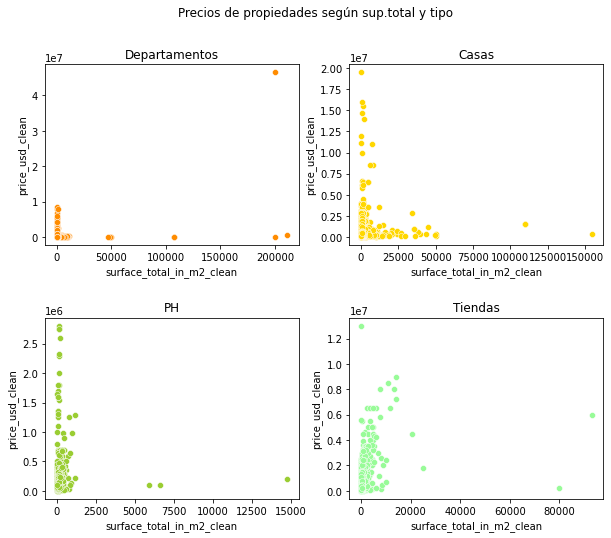

In [45]:
# scatterplot para ver valores extremos entre
# sup total en m2 y precio en USD ANTES de limpiar
# outliers de price_usd_per_m2_clean
fig,axes = plt.subplots(2,2,figsize=(10,8))
fig.suptitle("Precios de propiedades según sup.total y tipo")
plt.subplots_adjust(hspace=0.4)
sns.scatterplot(ax=axes[0,0],data=data[data['property_type']=='apartment'],x='surface_total_in_m2_clean',y='price_usd_clean',color="darkorange")
axes[0,0].set_title("Departamentos")
# axes[0,0].set_xlim(0,400)
sns.scatterplot(ax=axes[0,1],data=data[data['property_type']=='house'],x='surface_total_in_m2_clean',y='price_usd_clean',color="gold")
axes[0,1].set_title("Casas")
sns.scatterplot(ax=axes[1,0],data=data[data['property_type']=='PH'],x='surface_total_in_m2_clean',y='price_usd_clean',color="yellowgreen")
axes[1,0].set_title("PH")
sns.scatterplot(ax=axes[1,1],data=data[data['property_type']=='store'],x='surface_total_in_m2_clean',y='price_usd_clean',color="palegreen")
axes[1,1].set_title("Tiendas")

<a id="outli_usd_m2"></a>
**3.2.Identificación de outliers en price_usd_per_m2_clean**

[volver a TOC](#section_toc)

In [46]:
# tratamiento de outliers para price_USD_per_m2_clean
# vemos outliers con IQR

Q1_obj = data['price_usd_per_m2_clean'].quantile(0.25)
Q3_obj = data['price_usd_per_m2_clean'].quantile(0.75)
IQR_obj = Q3_obj-Q1_obj
print(IQR_obj)

#vemos outliers mediante asimetría
# el skewness value explica hasta qué grado la var está distribuida normalmente
# idealmente el skewness value está entre +1 y -1, y cualquier desviación
# importante de este rango indica la presencia de valores extremos
# para la var price_usd_per_m2_clean el val de skewness es de 0.87, indicando que 
# la var tiene distrib aproximadamente normal

print(data['price_usd_per_m2_clean'].skew())

1291.4438502673797
91.50475796290536


In [47]:
# identificaremos outliers de la var price_usd_clean agrupando por tipo de propiedad 
# y provincia
# veamos provincias con más de 100 registros
states = data['state_name'].value_counts()
lim_mask = states>100
unique_st = list(states[lim_mask].index)
df_price_usd = data[['price_usd_clean','state_name','property_type']]
# df_price_usd.shape[0]


def verify_outli(df,prop_type,prov_list,col):
    q_for_df = []
#   prop type
    prop_mask = df['property_type']==prop_type
#     iteramos por cada prov para ese tipo de prop
    for p in prov_list:
        prov_mask = df['state_name']==p
        out_mask = np.logical_and(prop_mask,prov_mask)
        data_out = df[out_mask]
    #     valores que nos interesan para analizar outliers
        cant = data_out.shape[0]
        Q1 = data_out[col].quantile(0.25)
        Q2 = data_out[col].quantile(0.5)
        Q3 = data_out[col].quantile(0.75)
        minimo = np.min(data_out[col])
        maximo = np.max(data_out[col])
        IQR = Q3-Q1
        out_val = (data_out[col]<(Q1-1.5*IQR))|(data_out[col]>(Q3+1.5*IQR))
        out_count = out_val.sum()
    #     dict con valores para cada provincia
        quantile_dict = {'Provincia':p,'Tipo prop':prop_type,'Cantidad':cant,
                        'Min':minimo,'Q1':Q1,'Q2':Q2,'Q3':Q3,'Max':maximo,
                         'Out_count':out_count}
        q_for_df.append(quantile_dict)
        
    quantile_df = pd.DataFrame(q_for_df)
    return quantile_df

In [48]:
# analizamos la var price_usd_per_m2_clean
df_usd_per_m2 = data[['price_usd_per_m2_clean','state_name','property_type']]
df_usd_per_m2.shape[0]

97165

In [49]:
# vemos los cuantiles, val max, min, cantidad de
# outliers identificados con IQR por tipo de prop
# para cada provincia
df_usd_per_m2_house = verify_outli(df_usd_per_m2,"house",unique_st,'price_usd_per_m2_clean')
df_usd_per_m2_dept = verify_outli(df_usd_per_m2,"apartment",unique_st,'price_usd_per_m2_clean')
df_usd_per_m2_ph = verify_outli(df_usd_per_m2,"PH",unique_st,'price_usd_per_m2_clean')
df_usd_per_m2_store = verify_outli(df_usd_per_m2,"store",unique_st,'price_usd_per_m2_clean')

In [50]:
# df_usd_per_m2_house.head()
# df_usd_per_m2_house['Out_count'].sum()-->1661
# df_usd_per_m2_dept.head()
# df_usd_per_m2_dept['Out_count'].sum()-->3612
# df_usd_per_m2_ph.head()
# df_usd_per_m2_ph['Out_count'].sum()-->312
# df_usd_per_m2_store.head()
# df_usd_per_m2_store['Out_count'].sum()-->261

<a id="outli_usd_m2_deletion"></a>
**3.3.Eliminación de outliers en price_usd_per_m2_clean**

[volver a TOC](#section_toc)

In [51]:
# función para eliminación de outliers
# en base al método IQR
# limpiamos cruzando tipo de prop y provincia
def clean_outli(df,prop_type,prov_list,col):
    df_out = pd.DataFrame()
    prop_mask = df['property_type']==prop_type
#     iteramos por cada prov para ese tipo de prop
    for p in prov_list:
        prov_mask = df['state_name']==p
        out_mask = np.logical_and(prop_mask,prov_mask)
        data_out = df[out_mask]
        cant = data_out.shape[0]
#         si hay menos de 30 registros, no eliminamos
        if cant < 30:
            continue
        Q1 = data_out[col].quantile(0.25)
        Q3 = data_out[col].quantile(0.75)
        IQR = Q3-Q1
#         devuelve datos con outliers
        out_val = data_out[((data_out[col]<(Q1-1.5*IQR))|(data_out[col]>(Q3+1.5*IQR)))]
        df_out = df_out.append(out_val)
        
    return df_out

In [52]:
df_out_usd_m2_house = clean_outli(df_usd_per_m2,"house",unique_st,'price_usd_per_m2_clean')
df_out_usd_m2_depto = clean_outli(df_usd_per_m2,"apartment",unique_st,'price_usd_per_m2_clean')
df_out_usd_m2_ph = clean_outli(df_usd_per_m2,"PH",unique_st,'price_usd_per_m2_clean')
df_out_usd_m2_store = clean_outli(df_usd_per_m2,"store",unique_st,'price_usd_per_m2_clean')

In [53]:
# limpiamos del df los registros que tienen outliers 
# para la var price_usd_per_m2_clean

data = data.drop(list(df_out_usd_m2_house.index))
data = data.drop(list(df_out_usd_m2_depto.index))
data = data.drop(list(df_out_usd_m2_ph.index))
data = data.drop(list(df_out_usd_m2_store.index))

In [54]:
data.shape[0]

91325

In [55]:
# skewness resultante 
print(data['price_usd_per_m2_clean'].skew())

1.0143260612610239


<AxesSubplot:xlabel='price_usd_per_m2_clean', ylabel='Density'>

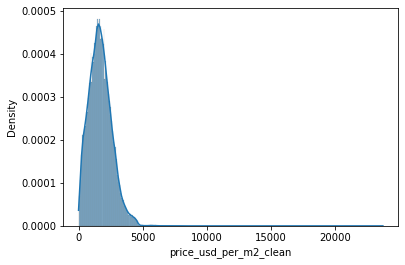

In [56]:
sns.histplot(data=data['price_usd_per_m2_clean'],stat='density', kde=True)

In [57]:
print(data['price_usd_clean'].skew())
print(data['surface_total_in_m2_clean'].skew())

8.844035973914236
73.57513416388382


Text(0.5, 1.0, 'Tiendas')

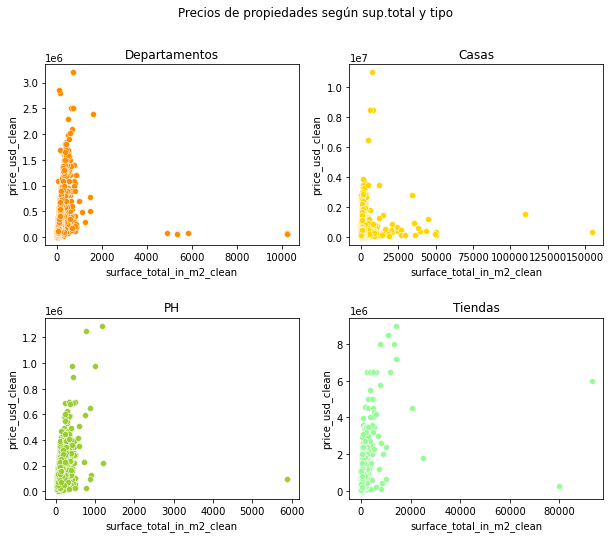

In [58]:
# scatterplot para ver valores extremos entre
# sup total en m2 y precio en USD DESPUÉS de limpiar
# outliers de price_usd_per_m2_clean
fig,axes = plt.subplots(2,2,figsize=(10,8))
fig.suptitle("Precios de propiedades según sup.total y tipo")
plt.subplots_adjust(hspace=0.4)
sns.scatterplot(ax=axes[0,0],data=data[data['property_type']=='apartment'],x='surface_total_in_m2_clean',y='price_usd_clean',color="darkorange")
axes[0,0].set_title("Departamentos")
# axes[0,0].set_xlim(0,400)
sns.scatterplot(ax=axes[0,1],data=data[data['property_type']=='house'],x='surface_total_in_m2_clean',y='price_usd_clean',color="gold")
axes[0,1].set_title("Casas")
sns.scatterplot(ax=axes[1,0],data=data[data['property_type']=='PH'],x='surface_total_in_m2_clean',y='price_usd_clean',color="yellowgreen")
axes[1,0].set_title("PH")
sns.scatterplot(ax=axes[1,1],data=data[data['property_type']=='store'],x='surface_total_in_m2_clean',y='price_usd_clean',color="palegreen")
axes[1,1].set_title("Tiendas")

<a id="outli_surface_tot_trim"></a>
**3.4.Trim sobre surface_total_in_m2_clean**

[volver a TOC](#section_toc)

In [59]:
# fn para remover puntos que son  outliers
def trim_outli(data,prop,li,ls,col):
    
    data_prop = data[data['property_type']==prop]
    data_prop_outli = data_prop[(data_prop[col]>=ls)|(data_prop[col]<=li)]

    data_out_idx = data_prop_outli.index
    return data_out_idx

In [60]:
# vemos cantidad de valores extremos para 
# superficie total en m2 en dptos 
# teniendo en cuenta los gráficos
dept_sup_idx = trim_outli(data,'apartment',5,4000,'surface_total_in_m2_clean')

In [61]:
# vemos cantidad de valores extremos para 
# superficie total en m2 en casas
# teniendo en cuenta los gráficos
casa_sup_idx = trim_outli(data,'house',5,55000,'surface_total_in_m2_clean')

In [62]:
# vemos cantidad de valores extremos para 
# superficie total en m2 en ph
# teniendo en cuenta los gráficos
ph_sup_idx = trim_outli(data,'PH',5,1000,'surface_total_in_m2_clean')

In [63]:
# vemos cantidad de valores extremos para 
# superficie total en m2 en stores
# teniendo en cuenta los gráficos
store_sup_idx = trim_outli(data,'store',5,2000,'surface_total_in_m2_clean')

In [64]:
# hacemos trim sobre los valores de sup total
# extremos que hallamos en los gráficos

data.drop(dept_sup_idx,inplace=True)
data.drop(casa_sup_idx,inplace=True)
data.drop(ph_sup_idx,inplace=True)
data.drop(store_sup_idx,inplace=True)

In [65]:
# la asimetría sigue alta
print(data['surface_total_in_m2_clean'].skew())

39.58062860087847


In [66]:
dept_sup_idx = trim_outli(data,'apartment',5,1250,'surface_total_in_m2_clean')
print(dept_sup_idx.shape[0])
casa_sup_idx = trim_outli(data,'house',5,35000,'surface_total_in_m2_clean')
print(casa_sup_idx.shape[0])
ph_sup_idx = trim_outli(data,'PH',5,600,'surface_total_in_m2_clean')
print(ph_sup_idx.shape[0])
store_sup_idx = trim_outli(data,'store',5,1250,'surface_total_in_m2_clean')
print(store_sup_idx.shape[0])

4
10
7
60


In [67]:
# hacemos trim sobre los valores de sup total
# extremos que hallamos en los gráficos

data.drop(dept_sup_idx,inplace=True)
data.drop(casa_sup_idx,inplace=True)
data.drop(ph_sup_idx,inplace=True)
data.drop(store_sup_idx,inplace=True)

In [68]:
# la asimetría sigue alta
# podríamos tratar a la variable con log transf
print(data['surface_total_in_m2_clean'].skew())

25.86165115404727


Text(0.5, 1.0, 'Tiendas')

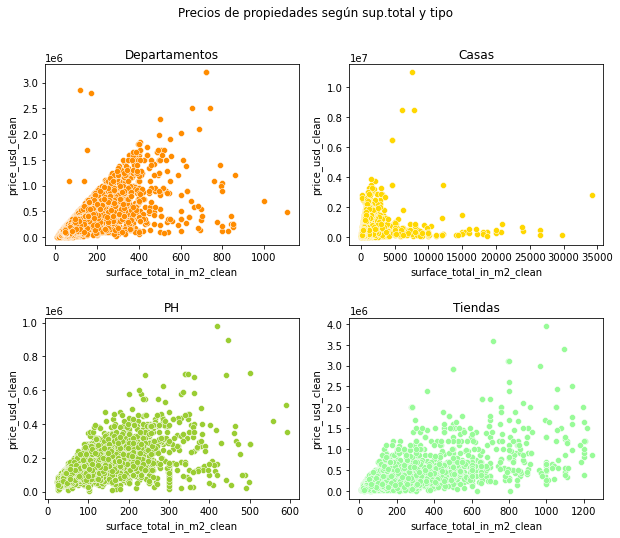

In [69]:
# scatterplot para ver valores extremos entre
# sup total en m2 y precio en USD DESPUÉS de limpiar
# outliers de price_usd_per_m2_clean
# y trimming sobre sup total
fig,axes = plt.subplots(2,2,figsize=(10,8))
fig.suptitle("Precios de propiedades según sup.total y tipo")
plt.subplots_adjust(hspace=0.4)
sns.scatterplot(ax=axes[0,0],data=data[data['property_type']=='apartment'],x='surface_total_in_m2_clean',y='price_usd_clean',color="darkorange")
axes[0,0].set_title("Departamentos")
# axes[0,0].set_xlim(0,400)
sns.scatterplot(ax=axes[0,1],data=data[data['property_type']=='house'],x='surface_total_in_m2_clean',y='price_usd_clean',color="gold")
axes[0,1].set_title("Casas")
sns.scatterplot(ax=axes[1,0],data=data[data['property_type']=='PH'],x='surface_total_in_m2_clean',y='price_usd_clean',color="yellowgreen")
axes[1,0].set_title("PH")
sns.scatterplot(ax=axes[1,1],data=data[data['property_type']=='store'],x='surface_total_in_m2_clean',y='price_usd_clean',color="palegreen")
axes[1,1].set_title("Tiendas")

In [70]:
df_total_surface = data[['surface_total_in_m2_clean','state_name','property_type']]
df_total_surface.shape[0]

91125

In [71]:
# vemos los cuantiles, val max, min, cantidad de
# outliers identificados con IQR por tipo de prop
# para cada provincia
df_total_surface_house = verify_outli(df_total_surface,"house",unique_st,'surface_total_in_m2_clean')
df_total_surface_dept = verify_outli(df_total_surface,"apartment",unique_st,'surface_total_in_m2_clean')
df_total_surface_ph = verify_outli(df_total_surface,"PH",unique_st,'surface_total_in_m2_clean')
df_total_surface_store = verify_outli(df_total_surface,"store",unique_st,'surface_total_in_m2_clean')

In [72]:
# df_total_surface_house['Out_count'].sum()-->2406
# df_total_surface_dept['Out_count'].sum()-->3661
# df_total_surface_ph['Out_count'].sum()-->198
# df_total_surface_store['Out_count'].sum()-->179

In [73]:
df_total_surface_store['Out_count'].sum()

179

In [74]:
# df_out_total_sup_house = clean_outli(df_total_surface,"house",unique_st,'surface_total_in_m2_clean')
# df_out_total_sup_dept = clean_outli(df_total_surface,"apartment",unique_st,'surface_total_in_m2_clean')
# df_out_total_sup_ph = clean_outli(df_total_surface,"PH",unique_st,'surface_total_in_m2_clean')
# df_out_total_sup_store = clean_outli(df_total_surface,"store",unique_st,'surface_total_in_m2_clean')

In [75]:
# # limpiamos del df los registros que tienen outliers 
# # para la var surface_total_in_m2_clean

# data = data.drop(list(df_out_total_sup_house.index))
# data = data.drop(list(df_out_total_sup_dept.index))
# data = data.drop(list(df_out_total_sup_ph.index))
# data = data.drop(list(df_out_total_sup_store.index))

# print(data['surface_total_in_m2_clean'].skew())

In [76]:
# otra opción para no borrar registros 
# de sup total es hacer transformación logarítmica...
# y así reducir la asimetría en la var
surface_total_log = np.log(data['surface_total_in_m2_clean'])
print(surface_total_log.skew())
surface_total_log
data.loc[surface_total_log.index,"surface_total_log"] = surface_total_log

0.7955456320044259


<AxesSubplot:xlabel='surface_total_log', ylabel='Count'>

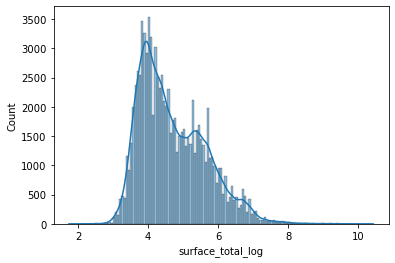

In [77]:
sns.histplot(data=data,x="surface_total_log",kde=True)

<a id="outli_surface_cov_trim"></a>
**3.5.Trim para outliers en surface_covered_in_m2_clean**

[volver a TOC](#section_toc)

Text(0.5, 1.0, 'Tiendas')

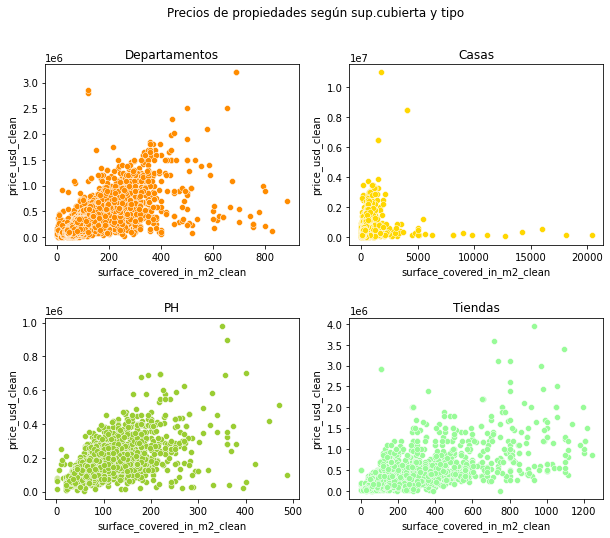

In [78]:
# scatterplot para ver valores extremos entre
# surface_covered_in_m2_clean y 
# precio en USD DESPUÉS de limpiar
# outliers de price_usd_per_m2_clean

fig,axes = plt.subplots(2,2,figsize=(10,8))
fig.suptitle("Precios de propiedades según sup.cubierta y tipo")
plt.subplots_adjust(hspace=0.4)
sns.scatterplot(ax=axes[0,0],data=data[data['property_type']=='apartment'],x='surface_covered_in_m2_clean',y='price_usd_clean',color="darkorange")
axes[0,0].set_title("Departamentos")
# axes[0,0].set_xlim(0,400)
sns.scatterplot(ax=axes[0,1],data=data[data['property_type']=='house'],x='surface_covered_in_m2_clean',y='price_usd_clean',color="gold")
axes[0,1].set_title("Casas")
sns.scatterplot(ax=axes[1,0],data=data[data['property_type']=='PH'],x='surface_covered_in_m2_clean',y='price_usd_clean',color="yellowgreen")
axes[1,0].set_title("PH")
sns.scatterplot(ax=axes[1,1],data=data[data['property_type']=='store'],x='surface_covered_in_m2_clean',y='price_usd_clean',color="palegreen")
axes[1,1].set_title("Tiendas")

In [79]:
# la var tiene sesgo alto
print(data['surface_covered_in_m2_clean'].skew())

41.90563639190333


In [80]:
dept_cov_idx = trim_outli(data,'apartment',5,600,'surface_covered_in_m2_clean')
casa_cov_idx = trim_outli(data,'house',5,5000,'surface_covered_in_m2_clean')
ph_cov_idx = trim_outli(data,'PH',5,300,'surface_covered_in_m2_clean')
store_cov_idx = trim_outli(data,'store',5,600,'surface_covered_in_m2_clean')

In [81]:
# cantidad de registros a sacar
print(dept_cov_idx.shape[0])
print(casa_cov_idx.shape[0])
print(ph_cov_idx.shape[0])
print(store_cov_idx.shape[0])

85
53
34
192


In [82]:
# hacemos trim sobre los valores extremos de sup cubierta
# que hallamos en los gráficos

data.drop(dept_cov_idx,inplace=True)
data.drop(casa_cov_idx,inplace=True)
data.drop(ph_cov_idx,inplace=True)
data.drop(store_cov_idx,inplace=True)

In [83]:
# el sesgo se redujo
print(data['surface_covered_in_m2_clean'].skew())

7.085285565558277


In [84]:
# hacemos transformación log en sup cubierta
surface_covered_log = np.log(data['surface_covered_in_m2_clean'])
print(surface_covered_log.skew())

data.loc[surface_covered_log.index,"surface_covered_log"] = surface_covered_log

0.5271623261129998


<a id="outli_amb"></a>
**3.6.Reemplazo de outliers en Ambientes**

[volver a TOC](#section_toc)

In [85]:
# Empezamos por identificar outliers en ambientes
# Ya en el max podemos ver un error de carga
print(data['ambientes'].skew())
data['ambientes'].describe()

265.69751419855874


count    80671.000000
mean         3.288716
std         72.827535
min          1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max      20174.000000
Name: ambientes, dtype: float64

In [86]:
print(data['ambientes'].quantile(0.10))
print(data['ambientes'].quantile(0.90))
data["ambientes"] = np.where(data["ambientes"]>8,8,data["ambientes"])
print("La asimetría se reduce modificando el outlier: ",round(data["ambientes"].skew(),2))

1.0
5.0
La asimetría se reduce modificando el outlier:  0.84


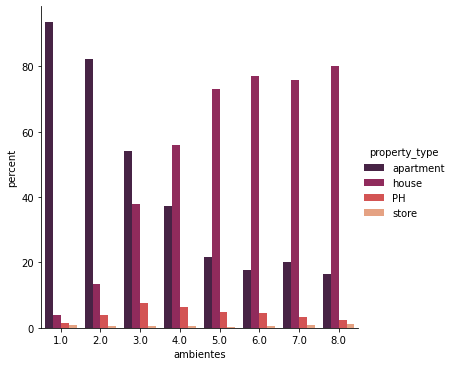

In [87]:
# porcentaje de propiedades agrupadas por cantidad de amb,y
# separadas por tipo
(data
.groupby('ambientes')['property_type']
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index()
.pipe((sns.catplot,'data'), x='ambientes',y='percent',hue='property_type',kind='bar',palette="rocket"))

<a id="outli_amb"></a>
**3.7.Trim para outliers en price_usd_clean**

[volver a TOC](#section_toc)

In [88]:
print(data['price_usd_clean'].skew())
data['price_usd_clean'].describe()

6.687153568389313


count    9.076100e+04
mean     2.104502e+05
std      2.184331e+05
min      4.952450e+03
25%      9.000000e+04
50%      1.430000e+05
75%      2.500000e+05
max      1.100000e+07
Name: price_usd_clean, dtype: float64

In [89]:
dept_usd_idx = trim_outli(data,'apartment',4000,2500000,'price_usd_clean')
casa_usd_idx = trim_outli(data,'house',4000,5000000,'price_usd_clean')
ph_usd_idx = trim_outli(data,'PH',4000,600000,'price_usd_clean')
store_usd_idx = trim_outli(data,'store',4000,2500000,'price_usd_clean')

In [90]:
# cantidad de registros a sacar
print(dept_usd_idx.shape[0])
print(casa_usd_idx.shape[0])
print(ph_usd_idx.shape[0])
print(store_usd_idx.shape[0])

2
5
7
2


In [91]:
# hacemos trim sobre los valores extremos de precio en usd
# que hallamos en los gráficos

data.drop(dept_usd_idx,inplace=True)
data.drop(casa_usd_idx,inplace=True)
data.drop(ph_usd_idx,inplace=True)
data.drop(store_usd_idx,inplace=True)

In [92]:
print(data['price_usd_clean'].skew())

4.054086840746922


<a id="section_elim_dup"></a> 
## 4. Eliminacion de Duplicados
Consideramos duplicados aquellos registros que coincidan en los campos:
  * property_type
  * place_name
  * place_with_parent_names
  * state_name 
  * surface_total_in_m2_clean
  * surface_total_in_m2_clean
  * title (transformado)

[volver a TOC](#section_toc)

In [93]:
# transformo el campo titulo 
title2=data['title'].str.upper()
title2.replace(to_replace=r'\s+', value='', regex=True,inplace=True)
title2.replace(to_replace=r'[^\w\s]', value='', regex=True,inplace=True)

data.loc[title2.notnull(),'title2'] = title2

duplicados = ['property_type', 'place_name' ,'place_with_parent_names','state_name',
              'surface_total_in_m2','surface_total_in_m2', 'title2']
              
data[duplicados].duplicated().sum()

17720

In [94]:
data['largo_description'] = data['description'].apply(lambda x:len(str(x))) #me cuenta que tan largo es
data = data.sort_values(by = ['largo_description'], ascending = False)      #me lo ordena de menor a mayor
data = data.drop_duplicates(subset = duplicados, keep = 'first')
display (data.shape)

(73025, 41)

<a id="section_varnuevas"></a>
## 5. Nuevos Campos 


[5.1. Seguridad](#section_seguridad)

[5.2. Jardin](#section_jardin)

[5.3. A Estrenar](#section_estrenar)

[5.4. Balcon](#section_balcon)

[5.5. Terraza](#section_terraza)

[5.6. Parrilla](#section_parrilla)

[5.7. Pileta](#section_pileta)

[5.8. Cochera](#section_cochera)

[5.9. Vista al lago](#section_cochera)

[5.10. Lavadero](#section_cochera)

[5.11. Sum](#section_cochera)

[5.9. Dummies para tipo de lugar](#section_dummies_place_type)

[5.10. Provincia, ciudad, partido y barrio](#section_places)

[volver a TOC](#section_toc)


Funciones graficos:


In [95]:
# genero regex en cada nuevo campo para poder calcular la cantidad que hay de cada valor y 
# asi utilizarlo en las funciones que cree (pie, barritas y division_precio )

In [96]:
def pie (valor):
    chart_pie = pd.DataFrame (data [valor].value_counts ())
    chart_pie[valor + " (%)"] = round (pd.DataFrame (data[valor].value_counts())/data[valor].shape [0]*100,2)
       
    
    f, (ax1) = plt.subplots (1)
    f.set_figwidth (12)
    f.set_figheight (4.5)
    
    ax1.pie (chart_pie [valor], labels = chart_pie.index, autopct = '%1.1f%%', shadow = True)

    return

In [97]:
def barritas (valor):

    chart_barritas = (data.groupby ('property_type')[valor].sum ()/ data.groupby ('property_type') [valor].count())*100
    chart_barritas = pd.DataFrame (round (chart_barritas, 2))
    chart_barritas = chart_barritas.reset_index ()

    f, (ax1) = plt.subplots (1)
    f.set_figwidth (12)
    f.set_figheight (4.5)

    sns.barplot (x = 'property_type', y = valor, data = chart_barritas, ax = ax1)
   
    return

In [98]:
# data ['división_datos_precio'] = pd.qcut(data ['price_clean'],15, labels = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]) 
# def division_precio (valor):
    
#     chart_division = (data.groupby ('división_datos_precio')[valor].sum ()/ data.groupby ('división_datos_precio') [valor].count())*100
#     chart_division = pd.DataFrame (round (chart_division, 2))
#     chart_division = chart_division.reset_index ()
    
#     f, (ax1) = plt.subplots (1)
#     f.set_figwidth (12)
#     f.set_figheight (4.5)
    
#     sns.barplot (x = 'división_datos_precio', y = valor, data = chart_division, color = "#009966", ax = ax1)
   
#     return

  <a id="section_seguridad"></a> 

**5.1. Seguridad**: utilizamos regexs para extraer el dato de las columnas titulo y descripcion

[volver a TOC](#section_toc)

In [99]:
# Creo el campo seguridad
pattern_seguridad = "(?P<seg>seguridad|vigilancia|barrio cerrado|country|barrio privado)"

pattern_seguridad_regex = re.compile(pattern_seguridad,flags = re.IGNORECASE) #Perform case-insensitive matching

rdo_desc = desc_series.apply(lambda x: x if x is np.NaN else pattern_seguridad_regex.search(x))
rdo_title = title_series.apply(lambda x: x if x is np.NaN else pattern_seguridad_regex.search(x))

data.loc[rdo_desc.notnull(),'seguridad'] = 1
data.loc[rdo_title.notnull(),'seguridad'] = 1
data['seguridad'].fillna(0,inplace=True)
data['seguridad'].value_counts()

0.0    63154
1.0     9871
Name: seguridad, dtype: int64

In [100]:
# pie ('seguridad') 

In [101]:
# division_precio ('seguridad')

In [102]:
# barritas ('seguridad')

In [103]:
# plt.figure(figsize =(8, 15))
# sns.barplot(y = 'state_name', x = 'price_clean', hue = 'seguridad', data = data,  ci = None)

  <a id="section_jardin"></a> 

**5.2. Jardin**: utilizamos regexs para extraer el dato de las columnas titulo y descripcion

[volver a TOC](#section_toc)

In [104]:
# Creo el campo jardin
pattern_jardin = "(?P<jardin>jardin|parque|patio)"

pattern_jardin_regex = re.compile(pattern_jardin,flags = re.IGNORECASE) #Perform case-insensitive matching

rdo_desc = desc_series.apply(lambda x: x if x is np.NaN else pattern_jardin_regex.search(x))
rdo_title = title_series.apply(lambda x: x if x is np.NaN else pattern_jardin_regex.search(x))

data.loc[rdo_desc.notnull(),'jardin'] = 1
data.loc[rdo_title.notnull(),'jardin'] = 1
data['jardin'].fillna(0,inplace=True)
data['jardin'].value_counts()

0.0    45625
1.0    27400
Name: jardin, dtype: int64

In [105]:
# pie ('jardin') 

In [106]:
# division_precio ('jardin')

In [107]:
# barritas ('jardin')

In [108]:
# plt.figure(figsize =(8, 15))
# sns.barplot(y = 'state_name', x = 'price_clean', hue = 'jardin', data = data, ci=None)

  <a id="section_estrenar"></a> 

**5.3. A estrenar**: utilizamos regexs para extraer el dato de las columnas titulo y descripcion

[volver a TOC](#section_toc)

In [109]:
# Creo el campo a_estrenar
pattern_estrenar = "(?P<estrenar>estrenar)"

pattern_estrenar_regex = re.compile(pattern_estrenar,flags = re.IGNORECASE) #Perform case-insensitive matching

rdo_desc = desc_series.apply(lambda x: x if x is np.NaN else pattern_estrenar_regex.search(x))
rdo_title = title_series.apply(lambda x: x if x is np.NaN else pattern_estrenar_regex.search(x))

data.loc[rdo_desc.notnull(),'a_estrenar'] = 1
data.loc[rdo_title.notnull(),'a_estrenar'] = 1
data['a_estrenar'].fillna(0,inplace=True)
data['a_estrenar'].value_counts()

0.0    64640
1.0     8385
Name: a_estrenar, dtype: int64

In [110]:
# pie ('a_estrenar')

In [111]:
# barritas ('a_estrenar')

In [112]:
# division_precio ('a_estrenar')

In [113]:
# plt.figure(figsize =(8, 15))
# sns.barplot(y = 'state_name', x = 'price_clean', hue = 'a_estrenar', data = data, ci=None)

  <a id="section_balcon"></a> 

**5.4. Balcon**: utilizamos regexs para extraer el dato de las columnas titulo y descripcion

[volver a TOC](#section_toc)


In [114]:
# Creo el campo balcon
pattern_balcon = "(?P<balcon>balcon)"
pattern_balcon_regex = re.compile(pattern_balcon,flags = re.IGNORECASE) #Perform case-insensitive matching

rdo_desc = desc_series.apply(lambda x: x if x is np.NaN else pattern_balcon_regex.search(x))
rdo_title = title_series.apply(lambda x: x if x is np.NaN else pattern_balcon_regex.search(x))

data.loc[rdo_desc.notnull(),'balcon'] = 1
data.loc[rdo_title.notnull(),'balcon'] = 1

# corrijo los casos donde lo que aclara es que no tiene balcon
pattern_s_balcon = "(sin balcon|s\s?/\s?bal)"

pattern_s_balcon_regex = re.compile(pattern_s_balcon,flags = re.IGNORECASE) #Perform case-insensitive matching

rdo_desc = desc_series.apply(lambda x: x if x is np.NaN else pattern_s_balcon_regex.search(x))
rdo_title = title_series.apply(lambda x: x if x is np.NaN else pattern_s_balcon_regex.search(x))

data.loc[rdo_desc.notnull(),'balcon'] = 0
data.loc[rdo_title.notnull(),'balcon'] = 0
data['balcon'].fillna(0,inplace=True) # ver!! si no hago una diferenciacion por tipo de propiedad
data['balcon'].value_counts()
#data[(data['balcon']=='S') & (data['property_type']!='apartment')]

0.0    62554
1.0    10471
Name: balcon, dtype: int64

In [115]:
# barritas ('balcon')

In [116]:
# division_precio ('balcon')

In [117]:
# pie ('balcon')

In [118]:
# plt.figure(figsize =(8, 15))
# sns.barplot(y = 'state_name', x = 'price_clean', hue = 'balcon', data = data, ci=None)

  <a id="section_terraza"></a> 

**5.5. Terraza**: utilizamos regexs para extraer el dato de las columnas titulo y descripcion

[volver a TOC](#section_toc)

In [119]:
pattern_terraza = "(?P<terraza>terraza)"

pattern_terraza_regex = re.compile(pattern_terraza,flags = re.IGNORECASE) #Perform case-insensitive matching

rdo_desc = desc_series.apply(lambda x: x if x is np.NaN else pattern_terraza_regex.search(x))
rdo_title = title_series.apply(lambda x: x if x is np.NaN else pattern_terraza_regex.search(x))

data.loc[rdo_desc.notnull(),'terraza'] = 1
data.loc[rdo_title.notnull(),'terraza'] = 1
data['terraza'].fillna(0,inplace=True)
data['terraza'].value_counts()

0.0    55462
1.0    17563
Name: terraza, dtype: int64

In [120]:
# pie ('terraza')

In [121]:
# division_precio ('terraza')

In [122]:
# barritas ('terraza')

  <a id="section_parrilla"></a> 

**5.6. Parrilla**: utilizamos regexs para extraer el dato de las columnas titulo y descripcion

[volver a TOC](#section_toc)

In [123]:
pattern_parrilla = "(?P<parrilla>parrilla)"

pattern_parrilla_regex = re.compile(pattern_parrilla,flags = re.IGNORECASE) #Perform case-insensitive matching

rdo_desc = desc_series.apply(lambda x: x if x is np.NaN else pattern_parrilla_regex.search(x))
rdo_title = title_series.apply(lambda x: x if x is np.NaN else pattern_parrilla_regex.search(x))

data.loc[rdo_desc.notnull(),'parrilla'] = 1
data.loc[rdo_title.notnull(),'parrilla'] = 1
data['parrilla'].fillna(0,inplace=True)
data['parrilla'].value_counts()

0.0    49670
1.0    23355
Name: parrilla, dtype: int64

In [124]:
# pie ('parrilla')

In [125]:
# division_precio ('parrilla')

In [126]:
# barritas ('parrilla')

  <a id="section_pileta"></a> 

**5.7. Pileta**: utilizamos regexs para extraer el dato de las columnas titulo y descripcion

[volver a TOC](#section_toc)

In [127]:
pattern_pileta = "(?P<pileta>pileta|piscina)"

pattern_pileta_regex = re.compile(pattern_pileta,flags = re.IGNORECASE) #Perform case-insensitive matching

rdo_desc = desc_series.apply(lambda x: x if x is np.NaN else pattern_pileta_regex.search(x))
rdo_title = title_series.apply(lambda x: x if x is np.NaN else pattern_pileta_regex.search(x))

data.loc[rdo_desc.notnull(),'pileta'] = 1
data.loc[rdo_title.notnull(),'pileta'] = 1
data['pileta'].fillna(0,inplace=True)
data['pileta'].value_counts()

0.0    52439
1.0    20586
Name: pileta, dtype: int64

In [128]:
# pie ('pileta')

In [129]:
# barritas ('pileta')

In [130]:
# division_precio ('pileta')    

  <a id="section_cochera"></a> 

**5.8. Cochera**: utilizamos regexs para extraer el dato de las columnas titulo y descripcion

[volver a TOC](#section_toc)

In [131]:
# Creo el campo cochera
pattern_cochera = "(?P<cochera>cochera)"
pattern_cochera_regex = re.compile(pattern_cochera,flags = re.IGNORECASE) #Perform case-insensitive matching

rdo_desc = desc_series.apply(lambda x: x if x is np.NaN else pattern_cochera_regex.search(x))
rdo_title = title_series.apply(lambda x: x if x is np.NaN else pattern_cochera_regex.search(x))

data.loc[rdo_desc.notnull(),'cochera'] = 1
data.loc[rdo_title.notnull(),'cochera'] = 1

# corrijo los casos donde lo que aclara es que no tiene cochera
pattern_s_cochera = "(sin cochera|s\s?/\s?cochera)"

pattern_s_cochera_regex = re.compile(pattern_s_cochera,flags = re.IGNORECASE) #Perform case-insensitive matching

rdo_desc = desc_series.apply(lambda x: x if x is np.NaN else pattern_s_cochera_regex.search(x))
rdo_title = title_series.apply(lambda x: x if x is np.NaN else pattern_s_cochera_regex.search(x))

data.loc[rdo_desc.notnull(),'cochera'] = 0
data.loc[rdo_title.notnull(),'cochera'] =0
data['cochera'].fillna(0,inplace=True)
data['cochera'].value_counts()
#data[(data['balcon']=='S') & (data['property_type']!='apartment')]


0.0    47094
1.0    25931
Name: cochera, dtype: int64

  <a id="section_lago"></a> 

**5.9. Vista al lago**: utilizamos regexs para extraer el dato de las columnas titulo y descripcion

[volver a TOC](#section_toc)

In [132]:
# Creo el campo lago
pattern_lago = "(?P<lago>lago|laguna)"
pattern_lago_regex = re.compile(pattern_lago,flags = re.IGNORECASE) #Perform case-insensitive matching

rdo_desc = desc_series.apply(lambda x: x if x is np.NaN else pattern_lago_regex.search(x))
rdo_title = title_series.apply(lambda x: x if x is np.NaN else pattern_lago_regex.search(x))

data.loc[rdo_desc.notnull(),'lago'] = 1
data.loc[rdo_title.notnull(),'lago'] = 1

data['lago'].fillna(0,inplace=True)
data['lago'].value_counts()

0.0    69657
1.0     3368
Name: lago, dtype: int64

  <a id="section_lavadero"></a> 

**5.10. Lavadero**: utilizamos regexs para extraer el dato de las columnas titulo y descripcion

[volver a TOC](#section_toc)

In [133]:
# Creo el campo lavadero
pattern_lavadero = "(?P<lavadero>lavadero|laundry)"
pattern_lavadero_regex = re.compile(pattern_lavadero,flags = re.IGNORECASE) #Perform case-insensitive matching

rdo_desc = desc_series.apply(lambda x: x if x is np.NaN else pattern_lavadero_regex.search(x))
rdo_title = title_series.apply(lambda x: x if x is np.NaN else pattern_lavadero_regex.search(x))

data.loc[rdo_desc.notnull(),'lavadero'] = 1
data.loc[rdo_title.notnull(),'lavadero'] = 1

data['lavadero'].fillna(0,inplace=True)
data['lavadero'].value_counts()

0.0    42853
1.0    30172
Name: lavadero, dtype: int64

  <a id="section_sum"></a> 

**5.11. SUM**: utilizamos regexs para extraer el dato de las columnas titulo y descripcion

[volver a TOC](#section_toc)

In [134]:
pattern_sum = "(?P<sum>sum|s.u.m)"
pattern_sum_regex = re.compile(pattern_sum,flags = re.IGNORECASE) #Perform case-insensitive matching

rdo_desc = desc_series.apply(lambda x: x if x is np.NaN else pattern_sum_regex.search(x))
rdo_title = title_series.apply(lambda x: x if x is np.NaN else pattern_sum_regex.search(x))

data.loc[rdo_desc.notnull(),'sum'] = 1
data.loc[rdo_title.notnull(),'sum'] = 1

data['sum'].fillna(0,inplace=True)
data['sum'].value_counts()

0.0    63579
1.0     9446
Name: sum, dtype: int64

##### **5.12. Provincia, ciudad, partido y barrio**  <a name="section_places"></a>

[volver a TOC](#section_toc)

In [135]:
def get_place_type(place):
    s = place.strip('|').split('|')
    if(s[1]=='Capital Federal'):
        if(len(s)==2):
            return "ciudad"
        else:
            return "barrio"
    elif(s[1]=='Buenos Aires Interior'):
        if(len(s)==2):
            return "provincia"
        elif(len(s)==3):
            return "partido"
        else:
            return "ciudad"
    elif(s[1]=='Bs.As. G.B.A. Zona Norte' or s[1]=='Bs.As. G.B.A. Zona Sur' or s[1]=='Bs.As. G.B.A. Zona Oeste'):
        if(len(s)==2):
            return "provincia"
        elif(len(s)==3):
            return "partido"
        elif(len(s)==4):
            if(s[3].lower().find('barrio')!=-1 or s[3].lower().find('country')!=-1):
                return "barrio"
            else:
                return "ciudad"
        else:
            return "barrio"
    elif(s[1]=='Buenos Aires Costa Atlántica'):
        if(len(s)==2):
            return "provincia"
        elif(len(s)==3):
            return "ciudad"
        else:
            return "barrio"
    else:
        if(len(s)==2):
            return "provincia"
        else:
            return "ciudad"

In [136]:
parent_names = data['place_with_parent_names']

In [137]:
place_type = parent_names.apply(get_place_type)

In [138]:
data['place_type'] = place_type

In [139]:
dummies_place_type_lbl = pd.get_dummies(data["place_type"],prefix="place_type_lbl",drop_first=False)
data_with_dummies = data.join(dummies_place_type_lbl)

data_result = data_with_dummies.drop(labels=['place_type'], axis="columns")
data_result.head(3)

,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,description,title,price_usd_clean,price_clean,currency_clean,price_local_currency_clean,surface_total_in_m2_clean,surface_covered_in_m2_clean,surface_total_in_m2_regex,surface_covered_in_m2_regex,rooms_regex,ambientes,ambientes_regex,clean_floor,price_usd_per_m2_clean,price_per_m2_clean,surface_total_log,surface_covered_log,title2,largo_description,seguridad,jardin,a_estrenar,balcon,terraza,parrilla,pileta,cochera,lago,lavadero,sum,place_type_lbl_barrio,place_type_lbl_ciudad,place_type_lbl_partido,place_type_lbl_provincia
2907,sell,house,Tigre,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre|,Argentina,Bs.As. G.B.A. Zona Norte,3427753.0,"-34.3782959,-58.69849014",-34.378296,-58.698490,NaN,NaN,NaN,NaN,316.0,263.0,NaN,NaN,NaN,3.0,NaN,Hermosa casa a la laguna en uno de los mejores...,U$D 457.000 - Casa en Venta -,457000.0,457000.0,USD,8063536.5,316.0,263.0,0.0,0.0,2.0,3.0,3.0,NaN,1446.202532,1446.202532,5.755742,5.572154,UD457000CASAENVENTA,16920,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0,0,1,0
5179,sell,house,Tigre,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre|Tigre|,Argentina,Bs.As. G.B.A. Zona Norte,NaN,"-34.447361,-58.631426",-34.447361,-58.631426,345000.0,USD,6087352.5,345000.0,849.0,209.0,406.360424,1650.717703,NaN,3.0,NaN,Casa en venta en el barrio cerrado San Gabriel...,CASA en VENTA en COMPLEJO VILLA NUEVA - San Ga...,345000.0,345000.0,USD,6087352.5,849.0,209.0,0.0,0.0,NaN,3.0,NaN,NaN,406.360424,406.360424,6.744059,5.342334,CASAENVENTAENCOMPLEJOVILLANUEVASANGABRIEL,16319,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0,1,0,0
2282,sell,house,Tigre,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre|,Argentina,Bs.As. G.B.A. Zona Norte,3427753.0,"-34.36105728,-58.68397903",-34.361057,-58.683979,NaN,NaN,NaN,NaN,303.0,241.0,NaN,NaN,NaN,3.0,NaN,"Casa a la laguna en el Barrio San Francisco, u...",U$D 479.000 - Casa en Venta -,479000.0,479000.0,USD,8451715.5,303.0,241.0,1116.0,1116.0,3.0,3.0,4.0,NaN,1580.858086,1580.858086,5.713733,5.484797,UD479000CASAENVENTA,16056,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0,0,1,0


In [140]:
#col provincia
bs_as= ['Capital Federal','Bs.As. G.B.A. Zona Norte','Bs.As. G.B.A. Zona Sur','Buenos Aires Costa Atlántica','Bs.As. G.B.A. Zona Oeste','Buenos Aires Interior']
provincia = data["state_name"].apply(lambda x:x if x not in bs_as else "Buenos Aires")
data["provincia"] = provincia

In [141]:
def get_parent_city(place):
    p = place.strip('|').split('|')
    if(len(p)>3 and p[1]=='Capital Federal'):
        return p[-3]
    elif (len(p)==4 and (p[1]=='Bs.As. G.B.A. Zona Norte' or p[1]=='Bs.As. G.B.A. Zona Sur' or p[1]=='Bs.As. G.B.A. Zona Oeste' or p[1]=='Buenos Aires Interior')):
        return "N.A"
    else:
        return p[-2]

In [142]:
#col ciudad
#obtenemos registros que llegan hasta nivel de ciudad
city_dummie_mask = data_with_dummies['place_type_lbl_ciudad'] == 1
nivel_ciudad = data_with_dummies[city_dummie_mask]
ciudad = nivel_ciudad["place_name"]
#obtenemos registros que llegan hasta nivel de barrio
#para luego saber a qué ciudad pertenecen
barrio_dummie_mask = data_with_dummies['place_type_lbl_barrio'] == 1
barrio = data_with_dummies[barrio_dummie_mask]
ciudad_barrio = barrio['place_with_parent_names'].apply(get_parent_city)
ciudad_barrio
#definimos col ciudad
data.loc[ciudad.index,"ciudad"] = ciudad
data.loc[ciudad_barrio.index,"ciudad"] = ciudad_barrio
#completamos con N.A si no corresponde indicar ciudad
city_fill = data["ciudad"].fillna("N.A")
data["ciudad"] = city_fill

In [143]:
#col barrio
barrio_name = barrio["place_name"]
data.loc[barrio_name.index,"barrio"] = barrio_name
barrio_fill = data["barrio"].fillna("N.A")
data["barrio"] = barrio_fill
data["barrio"]

2907          N.A
5179          N.A
2282          N.A
2079          N.A
112428        N.A
           ...   
50342         N.A
28489     Palermo
82056         N.A
30598     Almagro
67371         N.A
Name: barrio, Length: 73025, dtype: object

In [144]:
#col partidos
#completamos place_name faltantes
null_place_name_mask = data['place_name'].isnull()
null_place_name = data[null_place_name_mask]
place_name_fill = data["place_name"].fillna("Tigre")
data["place_name"] = place_name_fill

In [145]:
def get_parent_partido(place):
    p = place.strip('|').split('|')
    if(len(p)==4):
        return p[-2]
    elif(len(p)>=5):
        return p[-3]

In [146]:
#obtenemos registros que llegan hasta nivel de partido
partido_dummie_mask = data_with_dummies['place_type_lbl_partido'] == 1
nivel_partido = data_with_dummies[partido_dummie_mask]
partido = nivel_partido["place_name"]

#obtenemos barrios o ciudades que estén en BA interior,N,S y O
zonas_ba = ['Bs.As. G.B.A. Zona Norte','Bs.As. G.B.A. Zona Sur','Bs.As. G.B.A. Zona Oeste','Buenos Aires Interior']
zonas_ba_mask = data_with_dummies['state_name'].apply(lambda x:True if x in zonas_ba else False)
ba = data_with_dummies[zonas_ba_mask]

#obtenemos partidos de ciudades de BsAs
ba_cities_mask = ba['place_type_lbl_ciudad']==1
ba_cities = ba.loc[ba_cities_mask,"place_with_parent_names"]
ba_cities_partido = ba_cities.apply(get_parent_partido)

#obtenemos partidos de barrios de BsAs
ba_barrios_mask = ba['place_type_lbl_barrio']==1
ba_barrios = ba.loc[ba_barrios_mask,"place_with_parent_names"]
ba_barrios_partido = ba_barrios.apply(get_parent_partido)

#definimos col partido
data.loc[partido.index,"partido"] = partido
data.loc[ba_cities_partido.index,"partido"] = ba_cities_partido
data.loc[ba_barrios_partido.index,"partido"] = ba_barrios_partido
#completamos con N.A si no corresponde indicar ciudad
partido_fill = data["partido"].fillna("N.A")
data["partido"] = partido_fill

In [147]:
data[["provincia","ciudad","barrio","partido"]].sample(5)

,provincia,ciudad,barrio,partido
11850,Buenos Aires,Jose Marmol,N.A,Almirante Brown
49348,Buenos Aires,Capital Federal,Recoleta,N.A
3858,Buenos Aires,N.A,N.A,Moreno
33684,Buenos Aires,Belén de Escobar,N.A,Escobar
83080,Buenos Aires,Capital Federal,N.A,N.A


In [148]:
# sns.set(rc={"figure.figsize": (30, 20)})
# bplot = sns.boxplot(y='price_clean', x='provincia', 
#                  data=data, 
#                  width=0.5,
#                  palette="colorblind")

## 6. Dataset Final

[volver a TOC](#section_toc)

Eliminamos las columnas provisorias:

In [149]:
data.dropna(subset=['ambientes'],inplace=True) 

In [150]:
data.to_csv('data_final_outli.csv')